In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import  LinearRegression as lr
pd.set_option('display.float_format', '{:.5f}'.format) ## Gets rid of scienfitic notation and procues

In [4]:
advanced_playoff_stats= pd.read_table('playoff_data_combined.csv', delimiter = ',')
advanced_playoff_stats

,year,reg_win,reg_ortg,reg_drtg,reg_efg,reg_tov,reg_drb,reg_ft_fga,playoff_win,playoff_ortg,playoff_drtg,playoff_efg,playoff_tov,playoff_drb,playoff_ft_fga
0,2021,36,112.00000,113.00000,0.54700,13.00000,78.20000,0.19600,2,117.60000,119.20000,0.57500,10.70000,80.30000,0.19300
1,2021,43,116.50000,114.90000,0.54300,11.50000,76.90000,0.17700,1,102.30000,114.90000,0.54200,12.20000,79.00000,0.19400
2,2021,44,113.60000,112.80000,0.52100,11.70000,75.10000,0.20100,0,116.30000,121.10000,0.56200,12.90000,69.90000,0.22300
3,2021,46,113.20000,113.60000,0.54100,11.90000,78.30000,0.19900,1,94.90000,109.40000,0.55300,13.90000,81.40000,0.17000
4,2021,46,114.30000,111.70000,0.53500,14.20000,74.90000,0.22700,2,106.40000,111.80000,0.51900,13.60000,72.50000,0.26800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2024,51,118.50000,114.30000,0.54900,13.10000,74.50000,0.17600,10,113.30000,113.30000,0.53000,12.80000,75.10000,0.23300
60,2024,52,115.30000,110.80000,0.52800,12.80000,76.20000,0.18600,3,112.10000,112.10000,0.52200,11.60000,76.20000,0.15500
61,2024,61,120.60000,111.10000,0.52200,11.60000,76.00000,0.15400,6,114.40000,108.40000,0.49100,11.40000,72.30000,0.19200
62,2024,64,121.70000,112.20000,0.52800,12.60000,74.80000,0.18100,5,123.50000,111.40000,0.56100,14.20000,79.50000,0.17400


In [5]:
advanced_playoff_stats.describe()

,year,reg_win,reg_ortg,reg_drtg,reg_efg,reg_tov,reg_drb,reg_ft_fga,playoff_win,playoff_ortg,playoff_drtg,playoff_efg,playoff_tov,playoff_drb,playoff_ft_fga
count,64.00000,64.00000,64.00000,64.00000,64.00000,64.00000,64.00000,64.00000,64.00000,64.00000,64.00000,64.00000,64.00000,64.00000,64.00000
mean,2022.50000,49.73438,116.08281,112.51250,0.53472,12.53437,76.32188,0.19234,5.26562,111.28594,114.27500,0.53630,12.02031,75.70938,0.20302
std,1.12687,6.19073,2.56370,2.40261,0.01196,1.06819,1.35418,0.01914,4.76509,5.81841,5.77883,0.02949,1.54295,4.27587,0.03460
min,2021.00000,36.00000,109.40000,106.90000,0.50200,10.40000,73.70000,0.14500,0.00000,94.90000,101.30000,0.48000,8.70000,64.70000,0.12500
25%,2021.75000,46.00000,114.47500,111.17500,0.52750,11.70000,75.17500,0.17800,1.00000,109.50000,111.37500,0.51500,11.00000,73.07500,0.18500
50%,2022.50000,49.00000,115.75000,112.90000,0.53600,12.50000,76.25000,0.19350,4.00000,111.95000,113.10000,0.53200,12.20000,75.40000,0.20450
75%,2023.25000,52.00000,117.70000,114.22500,0.54225,13.10000,77.22500,0.20600,7.25000,115.32500,118.72500,0.54975,12.82500,78.62500,0.22200
max,2024.00000,68.00000,123.20000,118.00000,0.56300,15.00000,78.70000,0.23400,16.00000,123.50000,137.39999,0.63000,15.80000,85.50000,0.28700


In [5]:
advanced_playoff_stats.corr()

,year,reg_win,reg_ortg,reg_drtg,reg_efg,reg_tov,reg_drb,reg_ft_fga,playoff_win,playoff_ortg,playoff_drtg,playoff_efg,playoff_tov,playoff_drb,playoff_ft_fga
year,1.00000,0.12173,0.41345,0.22630,0.22383,0.11341,-0.50449,-0.20464,-0.01626,0.05580,0.11237,-0.05135,-0.13557,-0.27705,-0.08731
reg_win,0.12173,1.00000,0.54787,-0.45289,-0.57743,-0.05020,-0.01615,-0.21990,0.49154,0.32150,-0.44667,-0.29204,0.33326,0.11751,-0.11223
reg_ortg,0.41345,0.54787,1.00000,0.36509,0.07249,-0.34854,-0.42336,-0.24400,0.25713,0.31150,-0.13924,-0.18208,-0.14762,-0.04241,-0.29441
reg_drtg,0.22630,-0.45289,0.36509,1.00000,0.80113,-0.40948,-0.38828,0.00419,-0.29228,0.01134,0.33840,0.16673,-0.48412,-0.12865,-0.17532
reg_efg,0.22383,-0.57743,0.07249,0.80113,1.00000,0.05595,-0.15813,0.08347,-0.24829,-0.10613,0.24933,0.16842,-0.26047,-0.07933,-0.00494
reg_tov,0.11341,-0.05020,-0.34854,-0.40948,0.05595,1.00000,-0.13309,0.54137,0.08861,-0.13730,-0.21185,-0.20859,0.54891,-0.26482,0.42017
reg_drb,-0.50449,-0.01615,-0.42336,-0.38828,-0.15813,-0.13309,1.00000,-0.18228,0.05911,-0.12845,-0.18583,0.12826,0.05775,0.57057,-0.10122
reg_ft_fga,-0.20464,-0.21990,-0.24400,0.00419,0.08347,0.54137,-0.18228,1.00000,-0.06473,-0.04106,-0.08820,-0.15433,0.23599,-0.20544,0.33935
playoff_win,-0.01626,0.49154,0.25713,-0.29228,-0.24829,0.08861,0.05911,-0.06473,1.00000,0.47555,-0.47260,-0.40134,0.19291,0.15530,-0.00879
playoff_ortg,0.05580,0.32150,0.31150,0.01134,-0.10613,-0.13730,-0.12845,-0.04106,0.47555,1.00000,0.09048,0.06065,-0.08404,-0.03953,0.00688


In [10]:
advanced_playoff_stats_2024=advanced_playoff_stats[advanced_playoff_stats['year']==2024]

advanced_playoff_stats_no_2024=advanced_playoff_stats[advanced_playoff_stats['year']<2024]



In [11]:
print(advanced_playoff_stats_no_2024.columns.tolist())

['year', 'reg_win', 'reg_ortg', 'reg_drtg', 'reg_efg', 'reg_tov', 'reg_drb', 'reg_ft_fga', 'playoff_win', 'playoff_ortg', 'playoff_drtg', 'playoff_efg', 'playoff_tov', 'playoff_drb', 'playoff_ft_fga']


In [12]:
## MODEL 2.1
## Code for running linear regression with our independant variable X (Defensive rating)
## and our response variable Y (Playoff Wins)
## Fits model and then gives R^2## 


X_train = advanced_playoff_stats_no_2024[["reg_drtg"]]  # note the double brackets
Y_train = advanced_playoff_stats_no_2024["playoff_win"]

X_test = advanced_playoff_stats_2024[["reg_drtg"]]
Y_test = advanced_playoff_stats_2024["playoff_win"]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg_model = LinearRegression().fit(X_train, Y_train)
predict = reg_model.predict(X_test)

r2 = r2_score(Y_test, predict)
print("R^2:", r2)

R^2: 0.007448428831084097


In [13]:
## MODEL 2.2
##Code for running linear regression with our independant variables, X1,X2,X3,X4
##(Opponent Effective Field Goal %,Opponent Turnover %, Defensive Rebound %,Opponent Free Throws per Field Goal Attempt)
## and our response variable Y (Playoff Wins)
## Fits model and then gives R^2

X_train=advanced_playoff_stats_no_2024[["reg_efg",'reg_tov',"reg_drb","reg_ft_fga"]]
Y_train=advanced_playoff_stats_no_2024["playoff_win"]
X_train=X_train.values
X_test=advanced_playoff_stats_2024[["reg_efg",'reg_tov',"reg_drb","reg_ft_fga"]]
X_test=X_test.values
Y_test=advanced_playoff_stats_2024["playoff_win"]

reg_model= lr().fit(X_train,Y_train)
predict=reg_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2=r2_score(Y_test, predict)
r2

-0.03290566083620372

In [14]:
## Looking into relationship between reg season advanced D Stats and Regular Season wins in the smaller sample size
X_train=advanced_playoff_stats_no_2024[["reg_efg",'reg_tov',"reg_drb","reg_ft_fga"]]
Y_train=advanced_playoff_stats_no_2024["reg_win"]
X_train=X_train.values
X_test=advanced_playoff_stats_2024[["reg_efg",'reg_tov',"reg_drb","reg_ft_fga"]]
X_test=X_test.values
Y_test=advanced_playoff_stats_2024["reg_win"]

reg_model= lr().fit(X_train,Y_train)
predict=reg_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2=r2_score(Y_test, predict)
r2

0.3461595652517786

In [15]:
## MODEL 2.3
## Combines indedpendant variables from model 1.1 and 1.2
##and our response variable Y (Playoff Wins)
## Fits model and then gives R^2

X_train = advanced_playoff_stats_no_2024[["reg_drtg","reg_efg",'reg_tov',"reg_drb","reg_ft_fga"]]  # note the double brackets
Y_train = advanced_playoff_stats_no_2024["playoff_win"]

X_test = advanced_playoff_stats_2024[["reg_drtg","reg_efg",'reg_tov',"reg_drb","reg_ft_fga"]]
Y_test = advanced_playoff_stats_2024["playoff_win"]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg_model = LinearRegression().fit(X_train, Y_train)
predict = reg_model.predict(X_test)

r2 = r2_score(Y_test, predict)
print("R^2:", r2)

R^2: -0.09257388528664978


In [22]:
## MODEL 2.4
##Code for running linear regression with our independant variable X (Offesnive rating)
##and our response variable Y (Regular Season Wins)
## Fits model and then gives R^2

X_train_o = advanced_playoff_stats_no_2024[["reg_ortg"]]  # note the double brackets
Y_train_o = advanced_playoff_stats_no_2024["playoff_win"]

X_test_o = advanced_playoff_stats_2024[["reg_ortg"]]
Y_test_o = advanced_playoff_stats_2024["playoff_win"]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg_model = LinearRegression().fit(X_train_o, Y_train_o)
predict = reg_model.predict(X_test_o)

r2 = r2_score(Y_test_o, predict)
print("R^2:", r2)

R^2: 0.1496679214333163


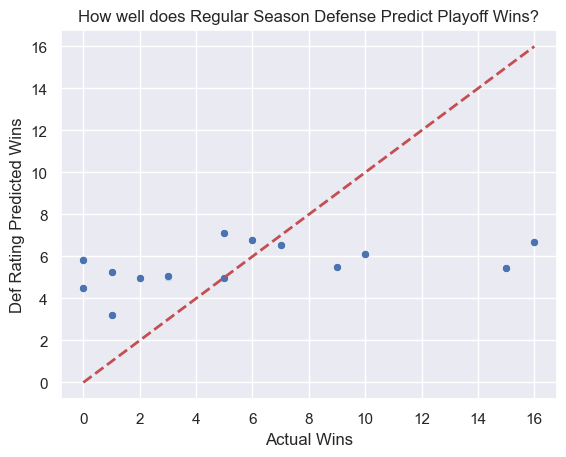

In [19]:
sns.set()
ax=sns.scatterplot(x=Y_test,y=predict)
ax.set(xlabel="Actual Wins",ylabel="Def Rating Predicted Wins",title="How well does Regular Season Defense Predict Playoff Wins?")
min_val = min(Y_test.min(), predict.min())
max_val = max(Y_test.max(), predict.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="y = x")

plt.show()

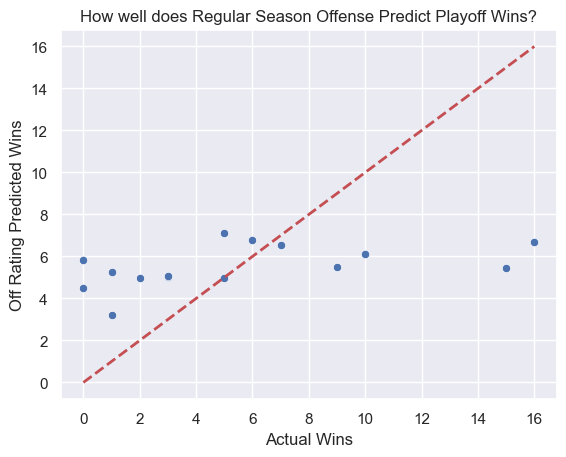

In [23]:
sns.set()
ax=sns.scatterplot(x=Y_test_o,y=predict)
ax.set(xlabel="Actual Wins",ylabel="Off Rating Predicted Wins",title="How well does Regular Season Offense Predict Playoff Wins?")
min_val = min(Y_test_o.min(), predict.min())
max_val = max(Y_test_o.max(), predict.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="y = x")

plt.show()

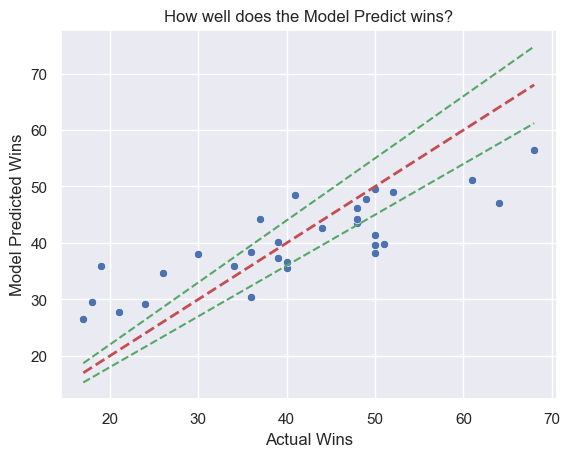

In [116]:

#ax=sns.scatterplot(x=Y_test,y=predict)
#ax.set(xlabel="Actual Wins",ylabel="Model Predicted Wins",title="How well does the Model Predict wins?")
#min_val = min(Y_test.min(), predict.min())
#max_val = max(Y_test.max(), predict.max())
#x_vals = [min_val, max_val]
#plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="y = x")
#plt.plot(x_vals, [v * 1.10 for v in x_vals], 'g--', lw=1.5, label="+10% error")
#plt.plot(x_vals, [v * 0.90 for v in x_vals], 'g--', lw=1.5, label="-10% error")

#plt.show()